In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import gc

In [2]:
from datasets import *
from models import *

In [3]:
sns.set()

In [4]:
%load_ext autoreload
%autoreload 2

In [28]:
df = pd.read_csv('.\\data\\train.csv', sep=',')

In [24]:
df.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


In [7]:
groups = df.columns[8:-13]
target_columns = ['target', 'severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat']

In [8]:
nan_count = df[groups].loc[:, 'asian'].isna().sum()
length = df.shape[0]
print('NANs: ', nan_count)
print('data rows: ', length)
print('non-NANs: ', length - nan_count)

NANs:  1399744
data rows:  1804874
non-NANs:  405130


In [10]:
s = None
for group in groups:
    if s is None:
        s = df[groups].loc[:, group].isna().sum()
    else:
        assert s == df[groups].loc[:, group].isna().sum(), 'Amount of NANs doesn\'t match'

In [29]:
nan_mask = df[groups].iloc[:, 0].isna()

df_train_net = df[nan_mask]
df_train_boost = df[~nan_mask]

del df

print('Net training size: ', df_train_net.shape[0])
print('Boosting training size: ', df_train_boost.shape[0])

Net training size:  1399744
Boosting training size:  405130


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
df_train_net = df_train_net.drop(groups, axis='columns')
target_net = df_train_net[target_columns]
df_train_net = df_train_net.drop(target_net, axis='columns')
df_train_net = df_train_net[['id', 'comment_text']]

In [12]:
target_net.head()

,target,severe_toxicity,obscene,identity_attack,insult,threat
0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
1,0.000000,0.000000,0.000000,0.0,0.000000,0.0
2,0.000000,0.000000,0.000000,0.0,0.000000,0.0
3,0.000000,0.000000,0.000000,0.0,0.000000,0.0
5,0.666667,0.047619,0.638095,0.0,0.333333,0.0


In [13]:
train_df = pd.concat((df_train_net, target_net), axis='columns')
train_df.to_csv('.\\data\\train_set.csv', index=False, sep=',')

In [14]:
train_df.head()

,id,comment_text,target,severe_toxicity,obscene,identity_attack,insult,threat
0,59848,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.000000,0.0,0.000000,0.0
1,59849,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.000000,0.0,0.000000,0.0
2,59852,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.000000,0.0,0.000000,0.0
3,59855,Is this something I'll be able to install on m...,0.000000,0.000000,0.000000,0.0,0.000000,0.0
5,59859,ur a sh*tty comment.,0.666667,0.047619,0.638095,0.0,0.333333,0.0


In [16]:
del df_train_net
del target_net


In [14]:
gc.collect()

0

In [12]:
X_train, X_test = train_test_split(train_df, test_size=0.2)
X_train.to_csv('.\\data\\x_train.csv', index=False, sep=',')
X_test.to_csv('.\\data\\x_test.csv', index=False, sep=',')

NameError: name 'train_test_split' is not defined

In [5]:
hidden_size = 128
num_layers = 2
learning_rate = 1e-3
num_classes = 6
batch_size = 256
num_epochs = 4

In [6]:
emb_path = "..\\Dasha\\embeddings\\crawl-300d-2M.vec"
emb_size = 300

In [7]:
emb = EmbeddingLoader(emb_path, emb_size, maxlen=1000000)

Loading embeddings from ..\Dasha\embeddings\crawl-300d-2M.vec...
Done.


In [7]:
train_data = DataLoader(path='.\\data\\x_train.csv', embedding=emb, batch_size=batch_size)
test_data = DataLoader(path='.\\data\\x_test.csv', embedding=emb, batch_size=batch_size)

Loading text...
Done.
Perfoming text editing...
Done.
Transforming text into a sequence of indices...
Done.
Loading text...
Done.
Perfoming text editing...
Done.
Transforming text into a sequence of indices...
Done.


In [13]:
model = nnPredictor(emb_size, hidden_size, num_layers, num_classes, emb.emb, batch_size=batch_size, dropout=0, load_from=".\\checkpoints\\bilstm_fft.pth")

In [21]:
train_loss, test_loss = model.train(data_train=train_data, data_test=test_data, num_epochs=num_epochs)

Train loss: 0.06486: : 4375it [25:16,  2.88it/s]                                                                       
1094it [03:42,  5.48it/s]                                                                                              
Train loss: 0.06253: : 4375it [25:33,  3.54it/s]                                                                       
1094it [03:44,  5.46it/s]                                                                                              


In [12]:
model.save(".\\checkpoints\\bilstm_fft.pth")

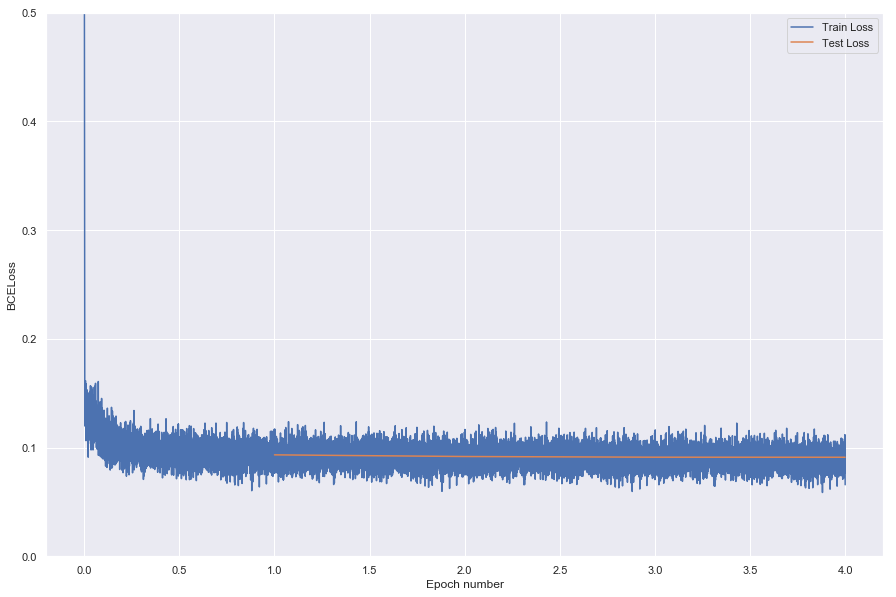

In [18]:
plt.figure(figsize=(15, 10))
plt.plot(np.arange(len(train_loss)) / (len(train_loss) - 1) * num_epochs, train_loss, label="Train Loss")
plt.plot(np.arange(len(test_loss)) + 1, test_loss, label='Test Loss')
plt.ylabel('BCELoss')
plt.xlabel('Epoch number')
plt.ylim([0, 0.5])
plt.legend()
plt.show()

## Test the results

In [34]:
from sklearn.metrics import roc_auc_score

In [30]:
cols = ['id'] + ['comment_text'] + target_columns
df_train_boost = df_train_boost.iloc[:, :8][cols]

In [31]:
df_train_boost.head()

,id,comment_text,target,severe_toxicity,obscene,identity_attack,insult,threat
4,59856,haha you guys are a bunch of losers.,0.893617,0.021277,0.000000,0.021277,0.87234,0.0000
11,239579,This is a great story. Man. I wonder if the pe...,0.440000,0.000000,0.293333,0.000000,0.32000,0.0000
19,239592,"Angry trolls, misogynists and Racists"", oh my....",0.500000,0.000000,0.000000,0.100000,0.50000,0.0000
20,239593,Nice to some attempts to try to make comments ...,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000
31,239607,Yet call out all Muslims for the acts of a few...,0.912500,0.050000,0.237500,0.612500,0.88750,0.1125


In [32]:
df_train_boost.to_csv('.\\data\\val_set.csv', index=False, sep=',')

In [9]:
val_loader = DataLoader(path='.\\data\\val_set.csv', embedding=emb, batch_size=batch_size, training=False)

Loading text...
Done.
Perfoming text editing...
Done.
Transforming text into a sequence of indices...
Done.


In [14]:
res = model.predict(val_loader)

1583it [05:26,  5.15it/s]                                                                                              


In [20]:
pred_target = res[:, 0]

In [31]:
val_set = pd.read_csv('.\\data\\val_set.csv', sep=',')

y_true = val_set['target']

y_true = np.where(y_true > 0.5, 1, 0)

In [35]:
print("AUC = ", roc_auc_score(y_true, pred_target))

AUC =  0.9537253039032456
